In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
# creating database connection
conn = sqlite3.connect('inventory.db')

# fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,3960,DIAGEO NORTH AMERICA INC,3102,Smirnoff Traveler,12.94,17.99,1750.0,9065.0,117301.10,1669.0,30025.31,6872.18,3066.52,257032.07,-87275.79,-290.674068,0.184115,0.255968
1,480,BACARDI USA INC,4227,Bacardi Superior Rum Trav,14.17,17.99,1750.0,8139.0,115329.63,2784.0,50084.16,8977.01,5115.20,89286.27,-65245.47,-130.271667,0.342057,0.434270
2,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,6014.0,97246.38,4985.0,109620.15,12974.10,9159.55,257032.07,12373.77,11.287861,0.828899,1.127241
3,480,BACARDI USA INC,3858,Grey Goose Vodka,17.77,23.99,750.0,5327.0,94660.79,2353.0,56448.47,12474.80,1852.58,89286.27,-38212.32,-67.694164,0.441712,0.596324
4,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,2629.0,69063.83,2632.0,94725.68,19578.56,4835.83,68601.68,25661.85,27.090700,1.001141,1.371567


In [3]:
df.to_csv('vendor_sales_summary.csv',index  = False)

In [4]:
# Summary statistics for numerical columns
summary_stats = df.describe().T  
display(summary_stats)

,count,mean,std,min,25%,50%,75%,max
VendorNumber,2858.0,7433.457313,11961.802166,105.00000,2242.000000,4425.000000,9206.000000,98450.000000
Brand,2858.0,14738.508747,13250.915554,58.00000,3940.000000,8497.500000,23422.500000,47027.000000
PurchasePrice,2858.0,12.756309,12.883325,0.62000,6.427500,9.080000,14.610000,240.590000
ActualPrice,2858.0,18.727292,17.683251,0.99000,9.990000,13.990000,20.990000,319.990000
Volume,2858.0,949.352344,693.954383,50.00000,750.000000,750.000000,750.000000,18000.000000
TotalPurchaseQuantity,2858.0,127.226382,425.999520,1.00000,12.000000,24.000000,82.000000,9065.000000
TotalPurchaseDollars,2858.0,1267.760385,5201.594846,3.37000,117.600000,258.135000,762.425000,117301.100000
TotalSalesQuantity,2858.0,194.667600,440.315964,0.00000,24.000000,73.000000,186.000000,8629.000000
TotalSalesDollars,2858.0,2481.346645,5516.134171,0.00000,403.995000,1082.230000,2529.137500,109620.150000
TotalSalesPrice,2858.0,1252.277103,1793.587969,0.00000,250.057500,689.770000,1518.087500,19578.560000


In [5]:
# Mode for each numerical column
mode_values = df.mode().iloc[0]
print("\nMode Values:\n\n", mode_values)


Mode Values:

 VendorNumber                            4425.0
VendorName               MARTIGNETTI COMPANIES
Brand                                       58
Description               Bacardi Superior Rum
PurchasePrice                             6.53
ActualPrice                               9.99
Volume                                   750.0
TotalPurchaseQuantity                     12.0
TotalPurchaseDollars                     79.44
TotalSalesQuantity                         0.0
TotalSalesDollars                          0.0
TotalSalesPrice                            0.0
TotalExciseTax                             0.0
FreightCost                          144929.24
GrossProfit                                0.0
ProfitMargin                               0.0
StockTurnover                              0.0
SalesToPurchaseRatio                       0.0
Name: 0, dtype: object


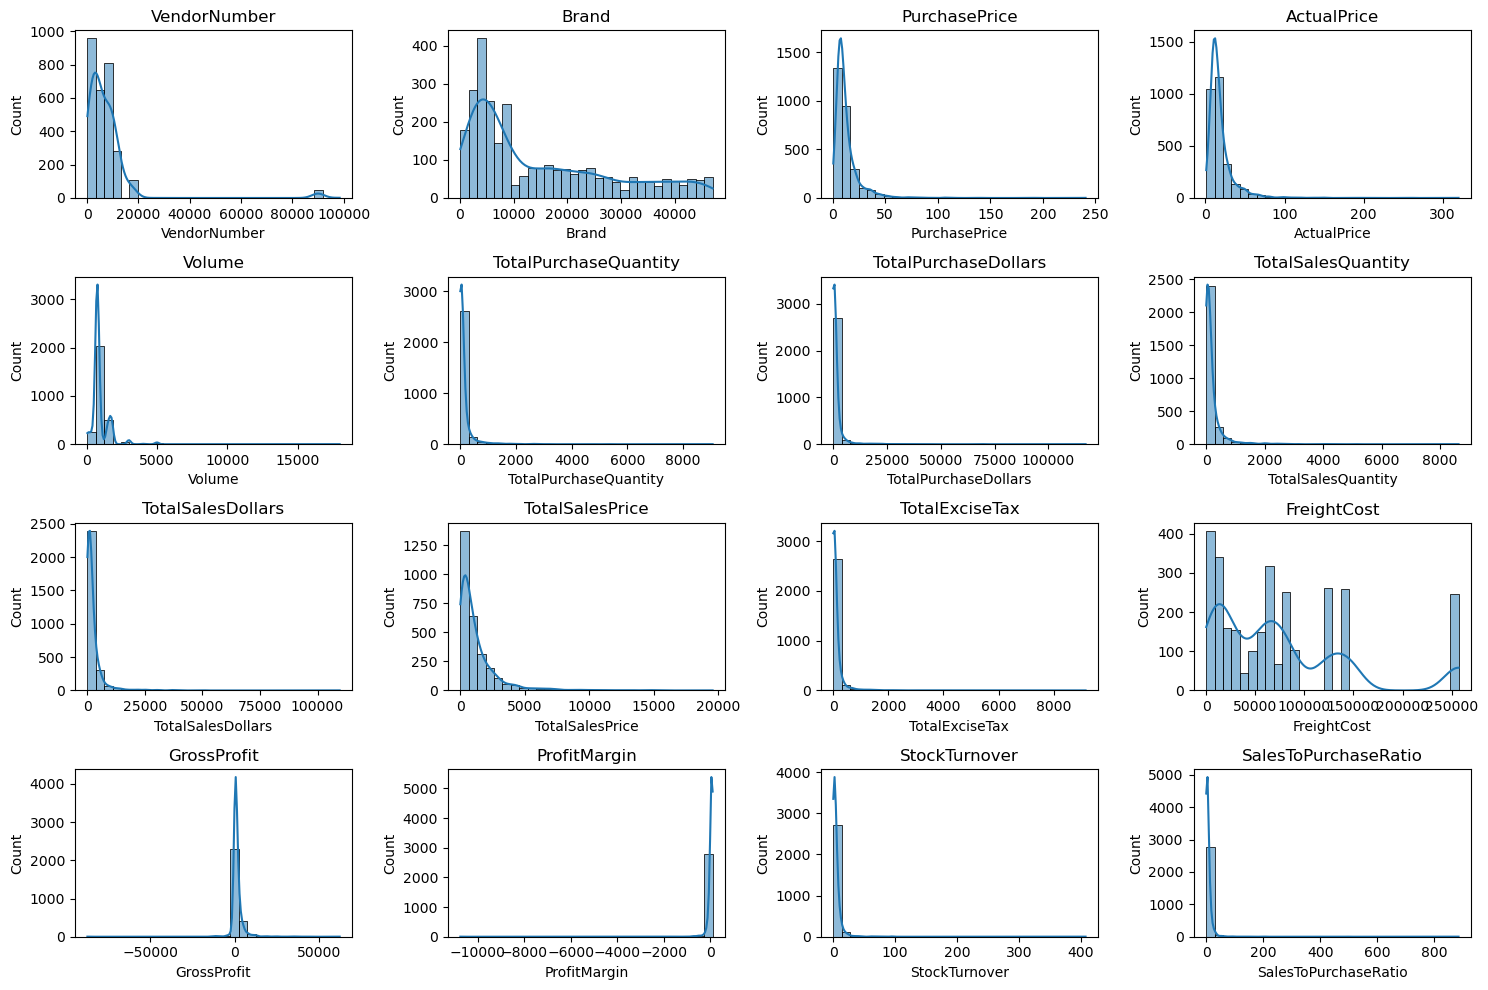

In [6]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

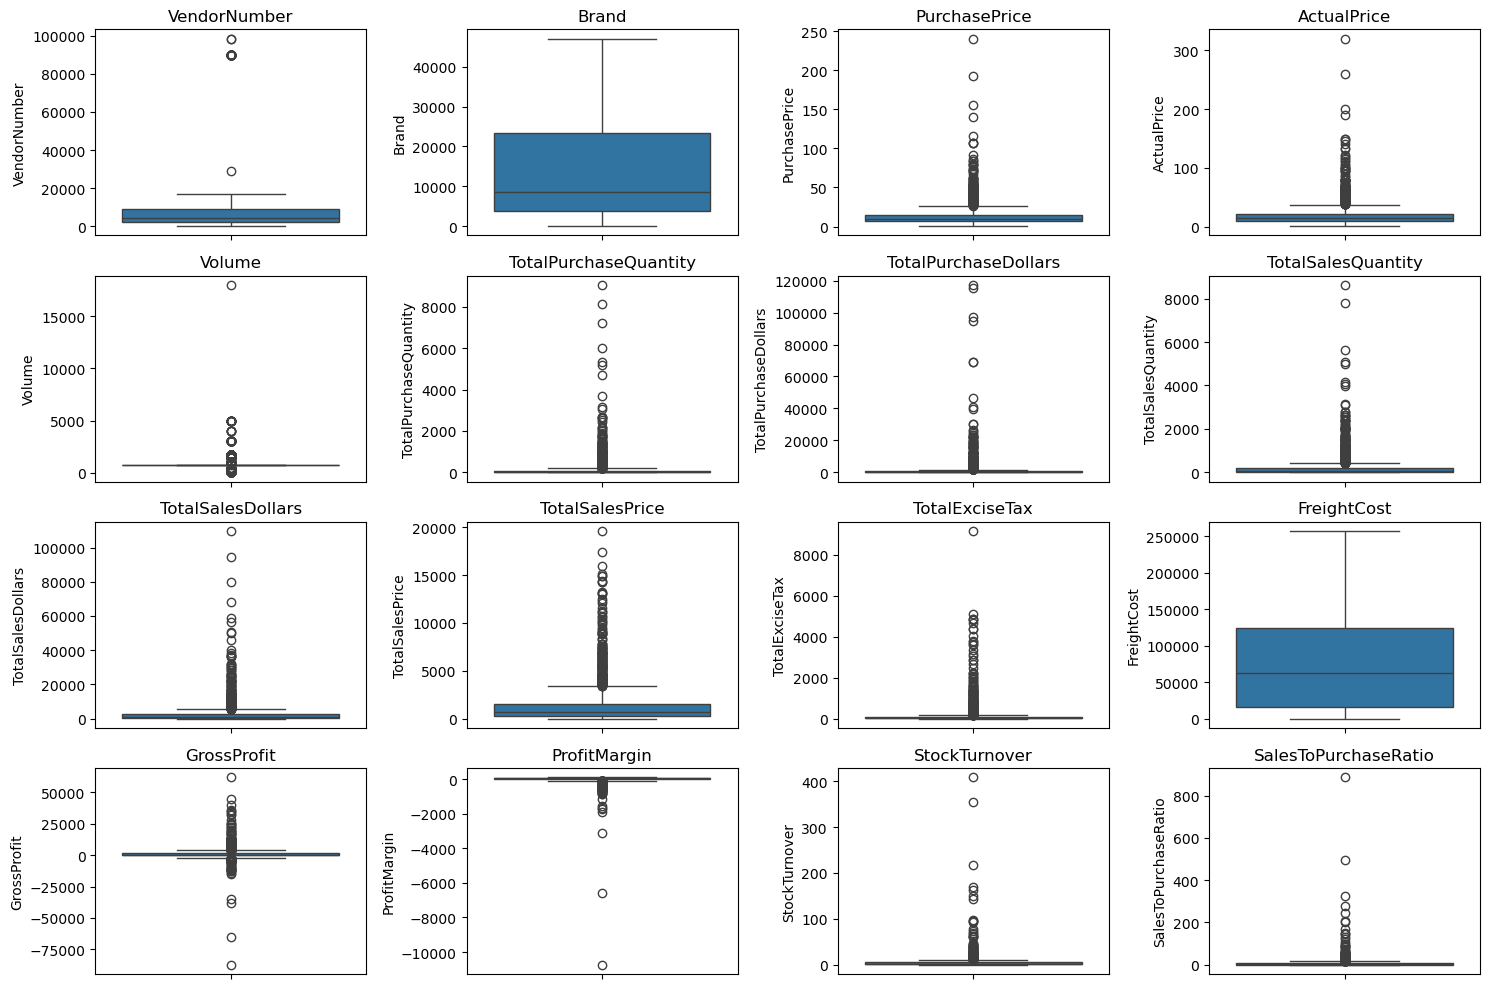

In [7]:
# Outlier Detection with Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [8]:
# let's filter the data by removing inconsistencies
df = pd.read_sql_query("""SELECT * 
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""",conn)

In [9]:
df.shape

(2254, 18)

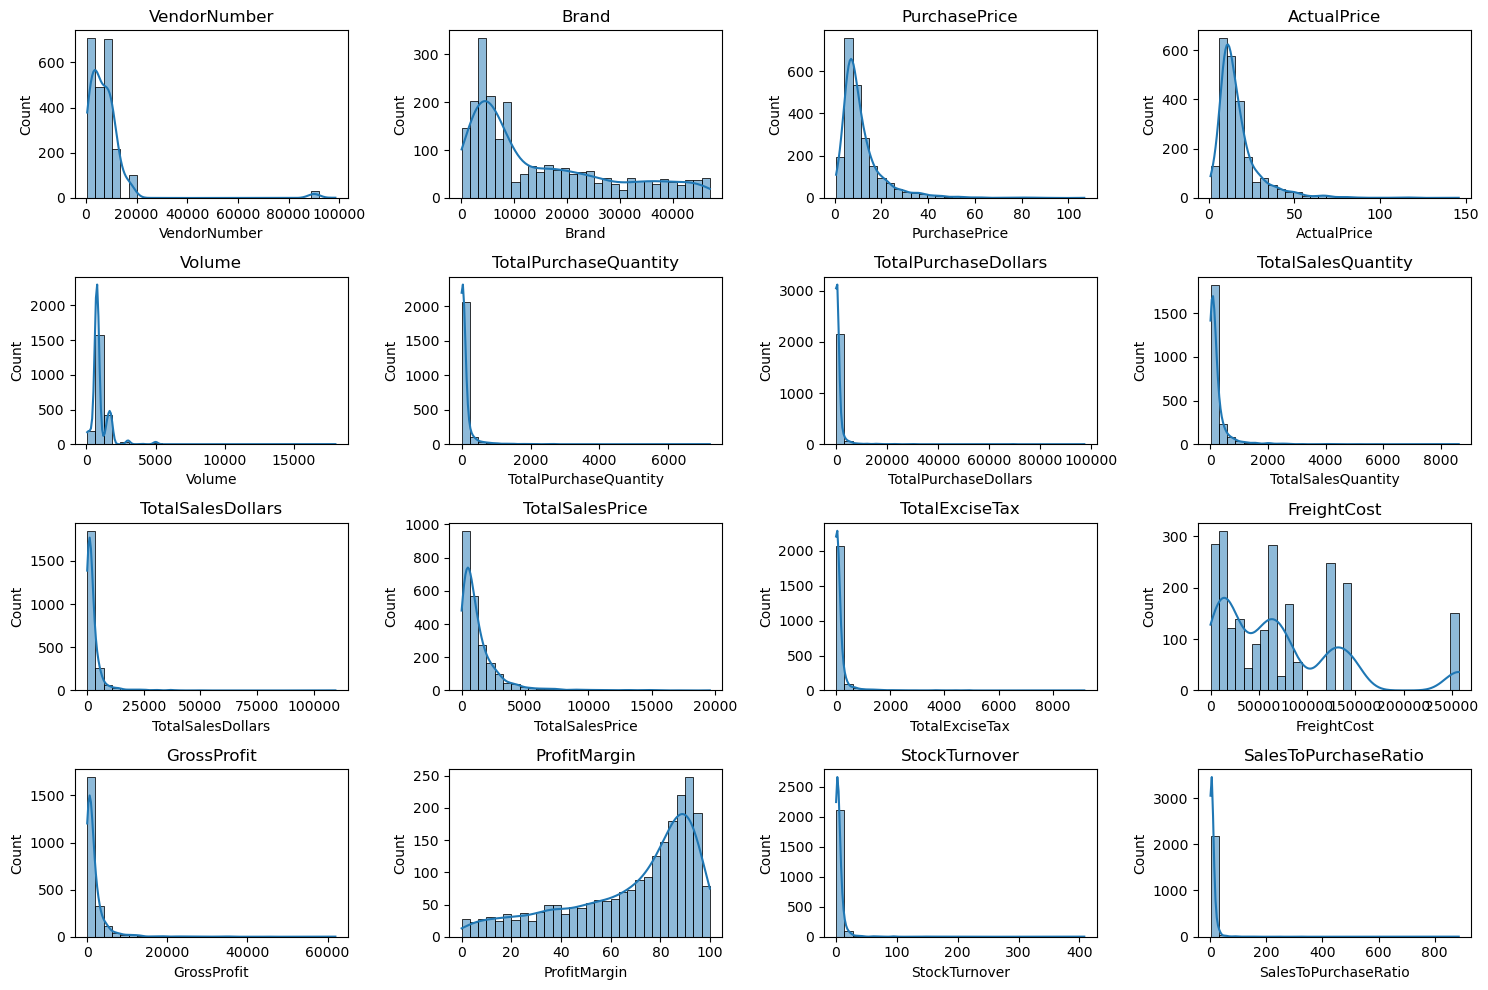

In [10]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

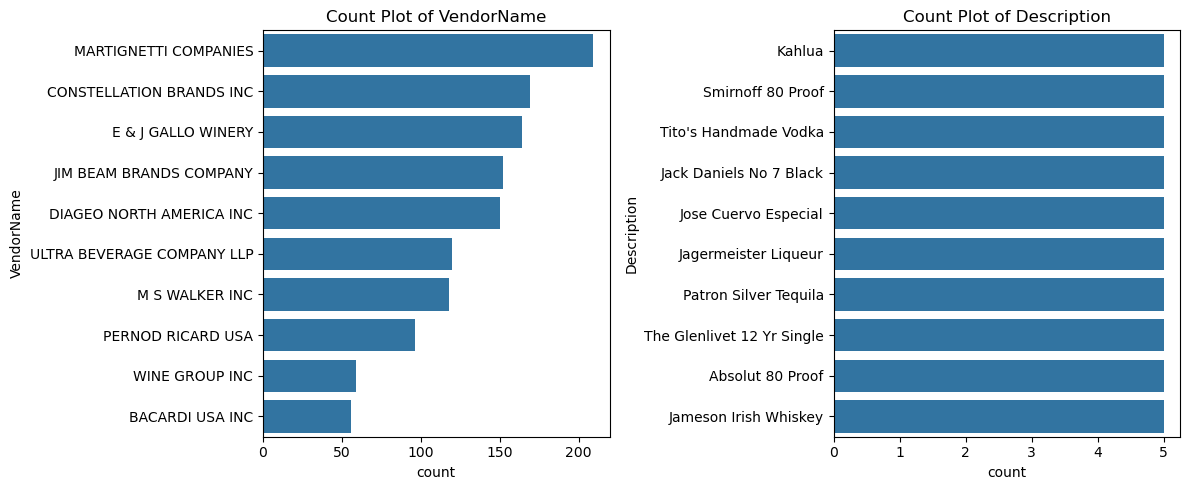

In [11]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])  # Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

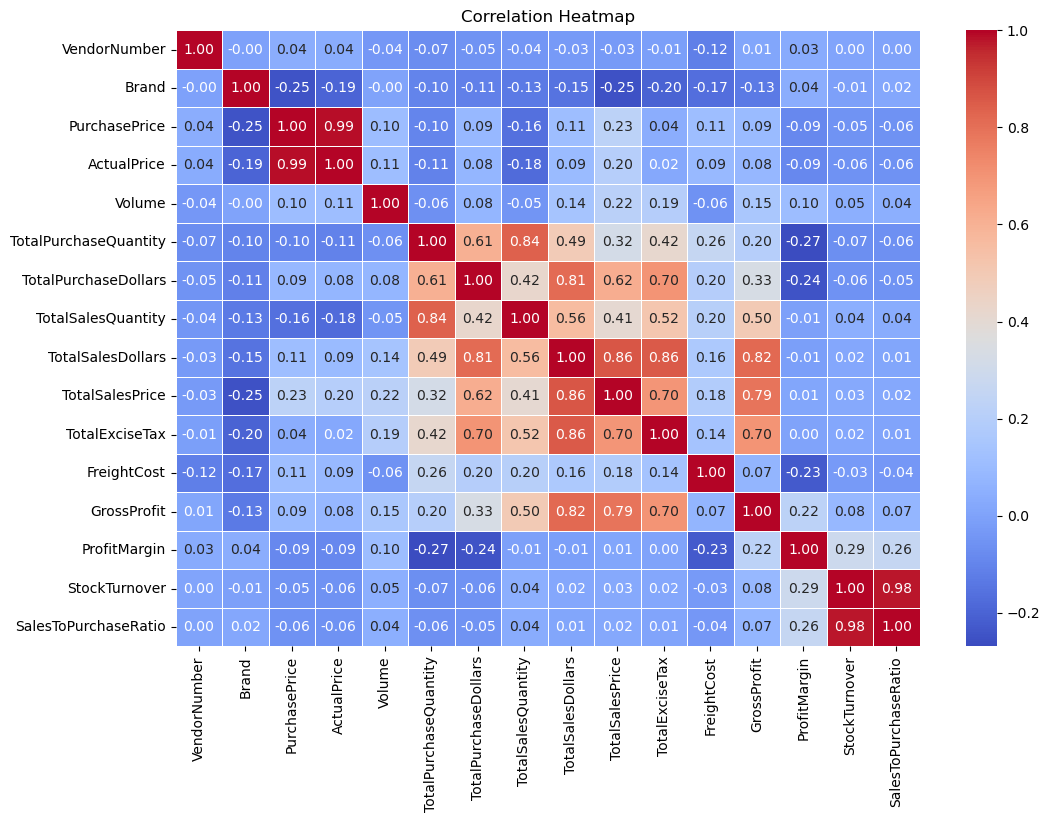

In [12]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [13]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',  # Sales performance metric
    'ProfitMargin': 'mean'       # Average profit margin
}).reset_index()

brand_performance.sort_values('ProfitMargin')

,Description,TotalSalesDollars,ProfitMargin
1510,Rodney Strong Pnt Nr,3671.07,0.053118
767,Fontana Candida Frascati,263.68,0.424757
336,Cabo Wabo Reposado Tequila,2178.45,0.568753
1649,Smirnoff Strawberry Vodka,2428.81,1.199764
780,Franciscan Est Svgn Bl Napa,239.84,1.334223
...,...,...,...
582,DK Burst Blustery Peppermint,1331.55,99.520108
898,Hardys Chard Ausl,2266.38,99.591419
1822,Tracia Malbec,1108.30,99.639989
658,Drops of Jupiter Red,1733.83,99.690858


In [14]:
# threshold for "low sales" (bottom 15%) and "high margin" (top 15%)
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
1040,Kamora Coffee Gift Pack,159.84,95.533033
1643,Smirnoff Peppermint Twist,186.12,97.028799
1829,Trimbach Riesling,269.85,95.527145
1037,Kahlua Pumpkin Spice Liqueur,284.85,92.775145
1055,Kenwood J London Cab Svgn,315.90,95.115543
799,Frogs Leap Cab Svgn Napa,317.94,93.970560
1927,Yellow Tail Sweet Red Roo,334.77,92.042298


In [15]:

brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000] # for better visualization

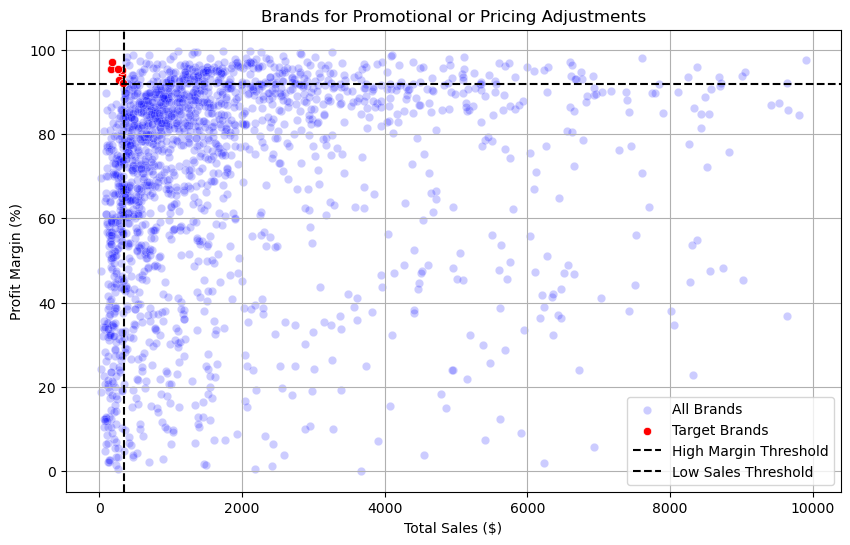

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [18]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      854865.73
JIM BEAM BRANDS COMPANY       584186.44
MARTIGNETTI COMPANIES         515115.89
PERNOD RICARD USA             482271.59
CONSTELLATION BRANDS INC      386899.32
E & J GALLO WINERY            342392.15
ULTRA BEVERAGE COMPANY LLP    236238.94
M S WALKER INC                231509.73
BROWN-FORMAN CORP             221684.81
BACARDI USA INC               211486.44
Name: TotalSalesDollars, dtype: float64

In [19]:
top_vendors.apply(lambda x:format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      854.87K
JIM BEAM BRANDS COMPANY       584.19K
MARTIGNETTI COMPANIES         515.12K
PERNOD RICARD USA             482.27K
CONSTELLATION BRANDS INC      386.90K
E & J GALLO WINERY            342.39K
ULTRA BEVERAGE COMPANY LLP    236.24K
M S WALKER INC                231.51K
BROWN-FORMAN CORP             221.68K
BACARDI USA INC               211.49K
Name: TotalSalesDollars, dtype: object

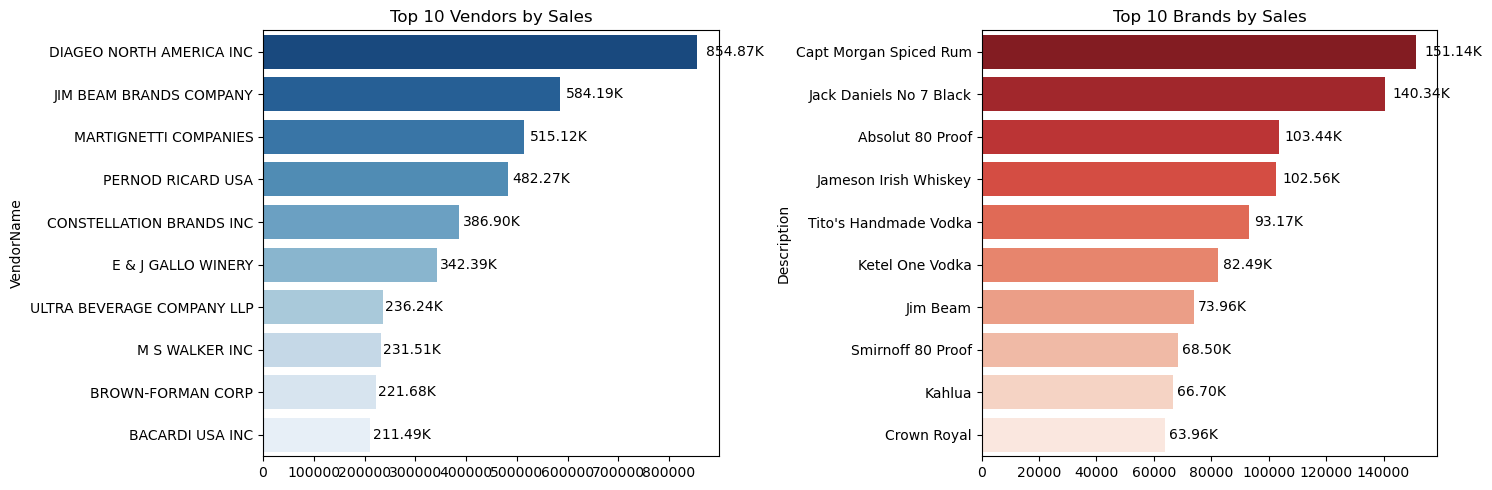

In [20]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02), 
             bar.get_y() + bar.get_height() / 2, 
             format_dollars(bar.get_width()), 
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02), 
             bar.get_y() + bar.get_height() / 2, 
             format_dollars(bar.get_width()), 
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [21]:
# Rank Vendors by Total Purchase Dollars
vendor_performance = df.groupby("VendorName").agg({
    "TotalPurchaseDollars": "sum",
    "GrossProfit": "sum",
    "TotalSalesDollars":"sum"
}).reset_index()

# Calculate Contribution % to Overall Procurement
vendor_performance["Purchase_Contribution%"] = (vendor_performance["TotalPurchaseDollars"] / vendor_performance["TotalPurchaseDollars"].sum()) * 100

# Rank Vendors by Total Purchase Dollars & Profitability
vendor_performance = round(vendor_performance.sort_values(by="TotalPurchaseDollars", ascending=False),2)

# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
12,DIAGEO NORTH AMERICA INC,575.01K,279.86K,854.87K,29.02
8,CONSTELLATION BRANDS INC,208.82K,178.08K,386.90K,10.54
2,BROWN-FORMAN CORP,164.13K,57.56K,221.68K,8.28
0,BACARDI USA INC,145.35K,66.14K,211.49K,7.34
36,MARTIGNETTI COMPANIES,119.66K,395.45K,515.12K,6.04
26,JIM BEAM BRANDS COMPANY,106.21K,477.97K,584.19K,5.36
45,PERNOD RICARD USA,77.62K,404.65K,482.27K,3.92
16,E & J GALLO WINERY,54.12K,288.27K,342.39K,2.73
69,ULTRA BEVERAGE COMPANY LLP,48.98K,187.25K,236.24K,2.47
54,SAZERAC CO INC,36.60K,168.63K,205.23K,1.85


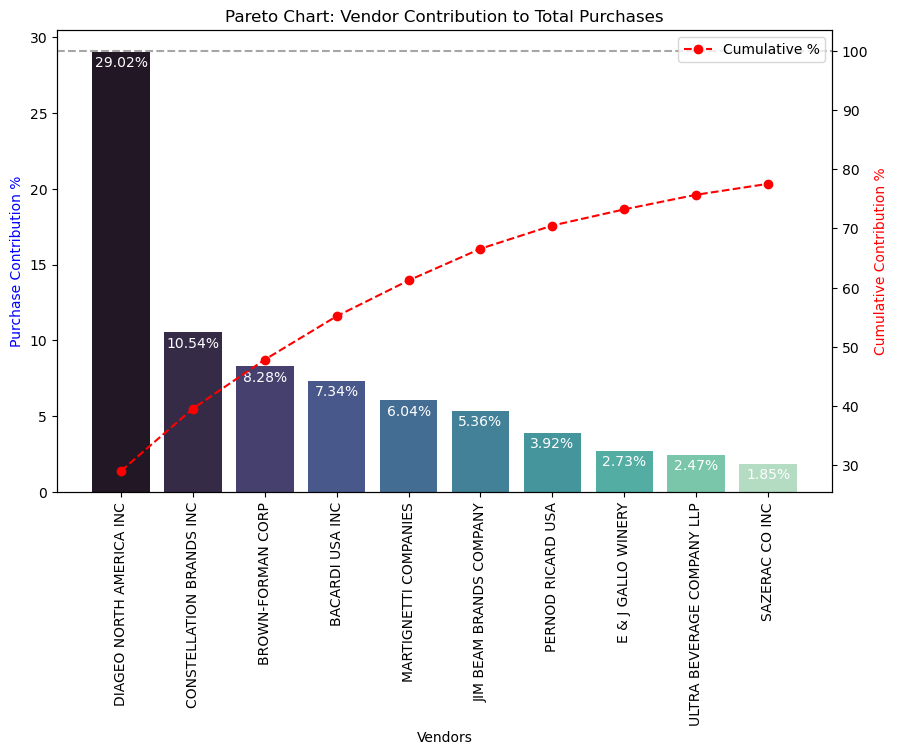

In [22]:
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['Purchase_Contribution%'],  palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

Total Purchase Contribution of top 10 vendors is 77.55 %


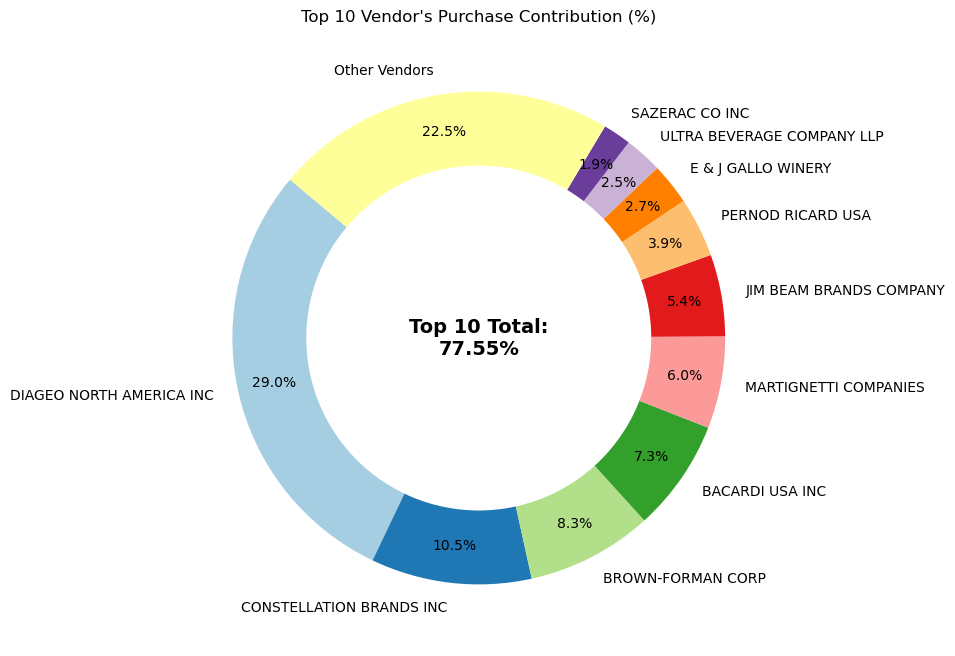

In [23]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['Purchase_Contribution%'].sum(),2)} %")

vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchase_Contribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

In [24]:
# Calculate Unit Purchase Price per Vendor & Volume Group
df["UnitPurchasePrice"] = df["TotalPurchaseDollars"] / df["TotalPurchaseQuantity"]

# Group by Order Sizes (e.g., Small, Medium, Large Purchases)
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

# Analyze Cost Savings per Order Size
bulk_purchase_analysis = df.groupby("OrderSize")["UnitPurchasePrice"].mean().reset_index()
print(bulk_purchase_analysis)

  OrderSize  UnitPurchasePrice
0     Small          14.167130
1    Medium          11.291685
2     Large           9.100387


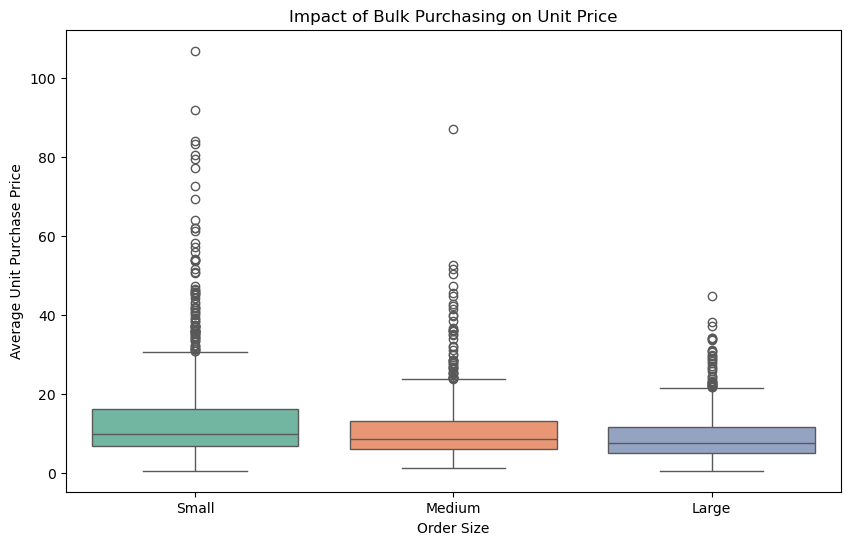

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

In [26]:
# Identify Low Inventory Turnover Vendors
low_turnover_vendors = df[df["StockTurnover"] < 1].groupby("VendorName")["StockTurnover"].mean().reset_index()

# Sort by Lowest Turnover
low_turnover_vendors = low_turnover_vendors.sort_values(by="StockTurnover", ascending=True)
low_turnover_vendors.head(10)

,VendorName,StockTurnover
15,HEAVEN HILL DISTILLERIES,0.606061
21,MAJESTIC FINE WINES,0.640909
18,KOBRAND CORPORATION,0.666667
39,VINEYARD BRANDS INC,0.666667
40,VINILANDIA USA,0.666667
4,CANDIA VINEYARDS,0.708333
12,DISARONNO INTERNATIONAL LLC,0.714879
27,PERNOD RICARD USA,0.736111
26,PERFECTA WINES,0.745040
37,TRINCHERO FAMILY ESTATES,0.750000


In [27]:
# Calculate Unsold Inventory Value
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df["UnsoldInventoryValue"].sum()))

# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

Total Unsold Capital: -2178155.92


,VendorName,UnsoldInventoryValue
2,BROWN-FORMAN CORP,7.02K
0,BACARDI USA INC,6.31K
13,DISARONNO INTERNATIONAL LLC,3.95K
11,DIAGEO CHATEAU ESTATE WINES,1.88K
76,WESTERN SPIRITS BEVERAGE CO,304.5
6,CASTLE BRANDS CORP.,222.39999999999998
5,CANDIA VINEYARDS,83.88999999999999
24,INCREDIBREW INC,51.96
3,BULLY BOY DISTILLERS,0.0
20,FORTUNE WINE BROKERS LLC,-7.89


Top Vendors 95% CI: (69.41, 73.86), Mean: 71.63
Low Vendors 95% CI: (55.52, 59.65), Mean: 57.58


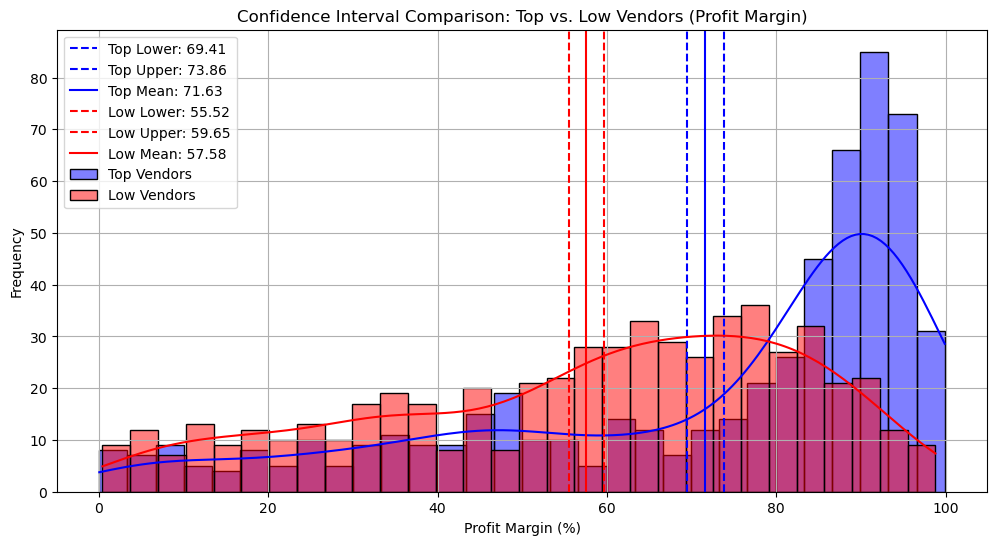

In [28]:
# Define top and low vendors based on Total Sales Dollars (Top 25% & Bottom 25%)
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Function to compute confidence interval
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

# Compute confidence intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")

T-Statistic: 9.0914, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.


In [2]:
# Use this script to save CSV files into a database with their filenames as table names

import pandas as pd
import os
from sqlalchemy import create_engine
import logging
import time

# Ensure log directory exists
os.makedirs("logs", exist_ok=True)

logging.basicConfig(
    filename="logs/ingestion_db.log",
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filemode="a"
)

# Create a SQLite database connection
engine = create_engine('sqlite:///inventory.db')


def ingest_db(df, table_name, engine):
    """This function ingests the dataframe into a database table."""
    df.to_sql(table_name, con=engine, if_exists='replace', index=False)
    logging.info(f"Table '{table_name}' ingested successfully.")


def load_raw_data():
    """This function loads all CSVs as dataframes and ingests them into the database."""
    start = time.time()

    data_path = 'data'
    if not os.path.exists(data_path):
        logging.error(f"Data directory '{data_path}' does not exist.")
        return

    csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]
    if not csv_files:
        logging.warning("No CSV files found in the 'data' directory.")
        return

    for file in csv_files:
        file_path = os.path.join(data_path, file)
        try:
            df = pd.read_csv(file_path)
            table_name = os.path.splitext(file)[0]
            logging.info(f"Ingesting '{file}' into table '{table_name}'.")
            ingest_db(df, table_name, engine)
        except Exception as e:
            logging.error(f"Failed to ingest '{file}': {e}")

    end = time.time()
    total_time = (end - start) / 60
    logging.info('-------------- Ingestion Complete ------------')
    logging.info(f"Total Time Taken: {total_time:.2f} minutes")


if __name__ == '__main__':
    load_raw_data()


Shape: (5543, 10)
After cleaning: (5543, 13)
=== Logistic Regression Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       370
           1       0.99      0.99      0.99       370
           2       0.99      0.99      0.99       369

    accuracy                           0.99      1109
   macro avg       0.99      0.99      0.99      1109
weighted avg       0.99      0.99      0.99      1109

=== Random Forest Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       370
           1       0.98      0.99      0.99       370
           2       0.99      0.98      0.98       369

    accuracy                           0.99      1109
   macro avg       0.99      0.99      0.99      1109
weighted avg       0.99      0.99      0.99      1109


Model Comparison:
                  Model  Accuracy   ROC_AUC
0  Logistic Regression  0.994590  0.999860
1        Random Forest 

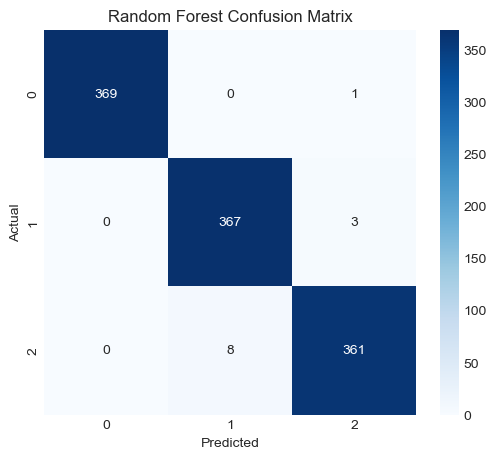

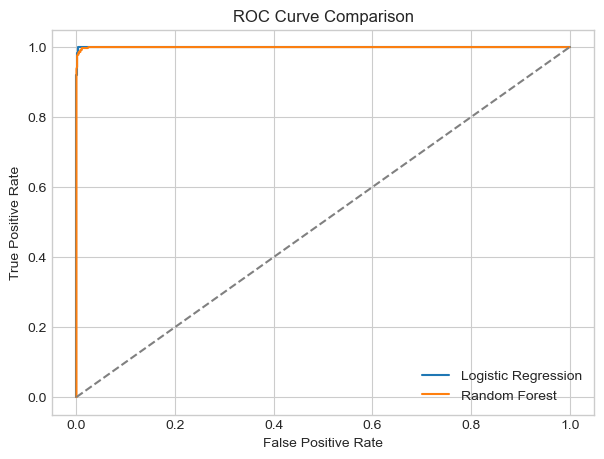

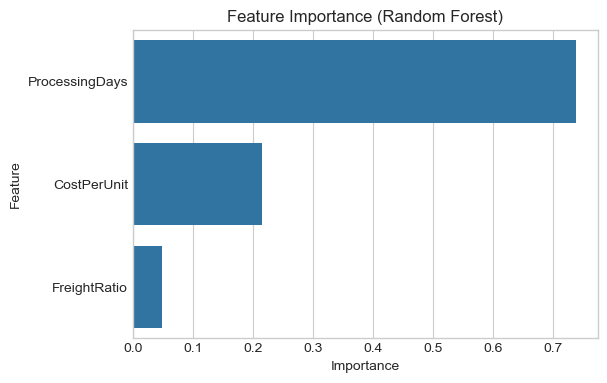

In [2]:

# Vendor_Risk_Classification.ipynb


# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load Dataset
# Replace with your dataset path
df = pd.read_csv("data/vendor_invoice.csv")
print("Shape:", df.shape)
df.head()

# Step 3: Convert Date Columns to Datetime
date_cols = ["InvoiceDate", "PODate", "PayDate"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Step 4: Feature Engineering
# Calculate how long payment takes
df["ProcessingDays"] = (df["PayDate"] - df["PODate"]).dt.days

# Calculate cost per unit
df["CostPerUnit"] = df["Dollars"] / df["Quantity"].replace(0, np.nan)

# Freight as a ratio of total dollars
df["FreightRatio"] = df["Freight"] / df["Dollars"].replace(0, np.nan)

# Remove rows with missing values from computed columns
df = df.dropna(subset=["ProcessingDays", "CostPerUnit", "FreightRatio"])
print("After cleaning:", df.shape)

# Step 5: Create a Risk Score (weighted combination)
# You can tweak the weights depending on business relevance
df["RiskScore"] = (
    (df["ProcessingDays"].clip(lower=0) * 0.5) +
    (df["FreightRatio"] * 100 * 0.3) +
    (df["CostPerUnit"] * 0.2)
)

# Step 6: Categorize Risk Levels into Low, Medium, High
df["RiskLevel"] = pd.qcut(df["RiskScore"], q=3, labels=["Low", "Medium", "High"])
df["RiskLevel"].value_counts()

# Step 7: Prepare Data for Modeling
features = ["ProcessingDays", "CostPerUnit", "FreightRatio"]
X = df[features]
y = df["RiskLevel"]

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Logistic Regression Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred_log))

# Step 9: Random Forest Model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("=== Random Forest Report ===")
print(classification_report(y_test, y_pred_rf))

# Step 10: Model Comparison
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf)
    ],
    "ROC_AUC": [
        roc_auc_score(y_test, log_model.predict_proba(X_test), multi_class="ovr"),
        roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class="ovr")
    ]
})
print("\nModel Comparison:\n", results)

# Step 11: Visualization - Confusion Matrix (Random Forest)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Blues", fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 12: ROC Curves
y_score_log = log_model.predict_proba(X_test)
y_score_rf = rf_model.predict_proba(X_test)

fpr_log, tpr_log, _ = roc_curve(y_test, y_score_log[:,1], pos_label=1)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf[:,1], pos_label=1)

plt.figure(figsize=(7,5))
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# Step 13: Feature Importance (Random Forest)
feat_imp = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Shape: (5543, 10)

Model Comparison:

               Model       MAE      RMSE        R2
0  Linear Regression  1.871851  4.341300  0.636411
1      Random Forest  0.150441  0.524999  0.994683


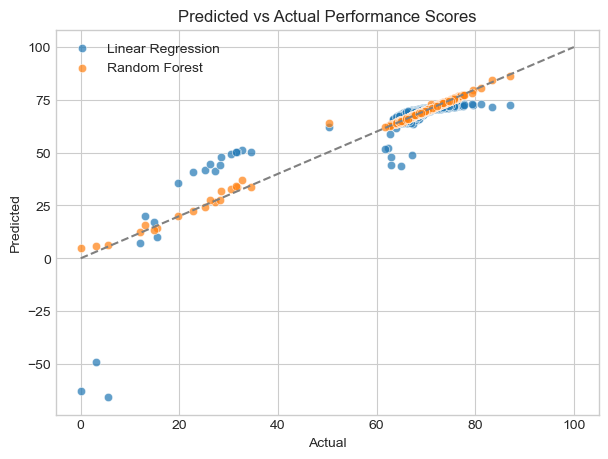

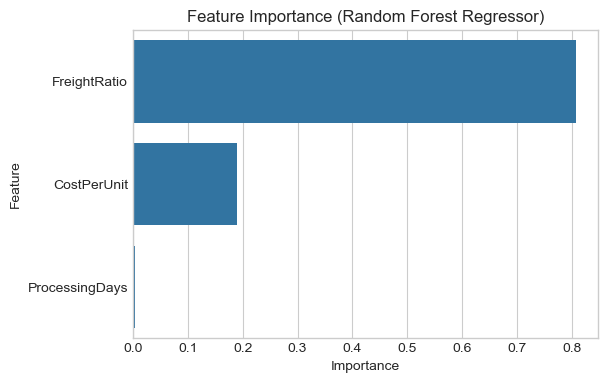


Top 5 Performing Vendors:
                       VendorName  PredictedScore
2537  DUGGANS DISTILLED PRODUCTS        97.622075
1856  OLE SMOKY DISTILLERY LLC          93.698981
2611  WESTERN SPIRITS BEVERAGE CO       93.476528
3059  OLE SMOKY DISTILLERY LLC          92.953276
4762  OLE SMOKY DISTILLERY LLC          91.010041

Bottom 5 Performing Vendors:
                     VendorName  PredictedScore
8   CALEDONIA SPIRITS INC              4.871212
75  TALL SHIP DISTILLERY LLC           5.190459
33  KLIN SPIRITS LLC                   5.706997
36  LAIRD & CO                         6.070732
88  ZORVINO VINEYARDS                  6.400189


In [3]:

# Vendor_Performance_Scoring.ipynb


# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load Dataset
df = pd.read_csv('data/vendor_invoice.csv')
print("Shape:", df.shape)
df.head()

# Step 3: Convert Date Columns to Datetime
date_cols = ["InvoiceDate", "PODate", "PayDate"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Step 4: Feature Engineering
df["ProcessingDays"] = (df["PayDate"] - df["PODate"]).dt.days
df["CostPerUnit"] = df["Dollars"] / df["Quantity"].replace(0, np.nan)
df["FreightRatio"] = df["Freight"] / df["Dollars"].replace(0, np.nan)
df = df.dropna(subset=["ProcessingDays", "CostPerUnit", "FreightRatio"])

# Step 5: Create a Continuous Vendor Performance Score
# You can invert the risk formula — lower delay & cost = higher performance
df["PerformanceScore"] = (
    (1 / (1 + df["ProcessingDays"].clip(lower=0))) * 0.5 +
    (1 / (1 + df["FreightRatio"] * 100)) * 0.3 +
    (1 / (1 + df["CostPerUnit"])) * 0.2
)

# Normalize the score between 0–100 for interpretability
df["PerformanceScore"] = (df["PerformanceScore"] - df["PerformanceScore"].min()) / \
                         (df["PerformanceScore"].max() - df["PerformanceScore"].min()) * 100

df[["VendorName", "PerformanceScore"]].head()

# Step 6: Prepare Data for Regression
features = ["ProcessingDays", "CostPerUnit", "FreightRatio"]
X = df[features]
y = df["PerformanceScore"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Step 8: Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Step 9: Model Evaluation
def evaluate_model(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2}

results = pd.DataFrame([
    evaluate_model(y_test, y_pred_lin, "Linear Regression"),
    evaluate_model(y_test, y_pred_rf, "Random Forest")
])
print("\nModel Comparison:\n")
print(results)

# Step 10: Visualization – Predicted vs Actual
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred_lin, label="Linear Regression", alpha=0.7)
sns.scatterplot(x=y_test, y=y_pred_rf, label="Random Forest", alpha=0.7)
plt.plot([0,100], [0,100], '--', color='gray')
plt.title("Predicted vs Actual Performance Scores")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

# Step 11: Feature Importance – Random Forest
feat_imp = pd.Series(rf_reg.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance (Random Forest Regressor)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Step 12: Display Top & Bottom Performing Vendors
df["PredictedScore"] = rf_reg.predict(scaler.transform(df[features]))
print("\nTop 5 Performing Vendors:")
print(df.sort_values(by="PredictedScore", ascending=False)[["VendorName", "PredictedScore"]].head())

print("\nBottom 5 Performing Vendors:")
print(df.sort_values(by="PredictedScore", ascending=True)[["VendorName", "PredictedScore"]].head())

Shape: (5543, 10)


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,NaN


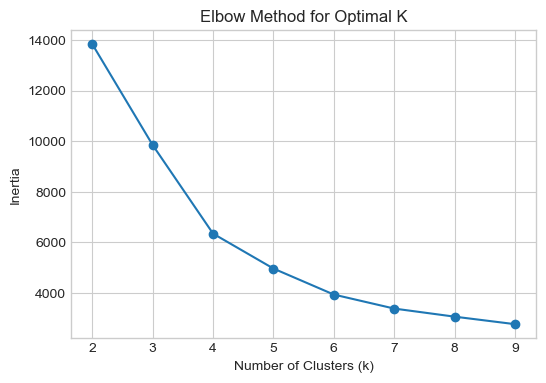

Silhouette Scores:
K-Means: 0.404
DBSCAN: 0.647


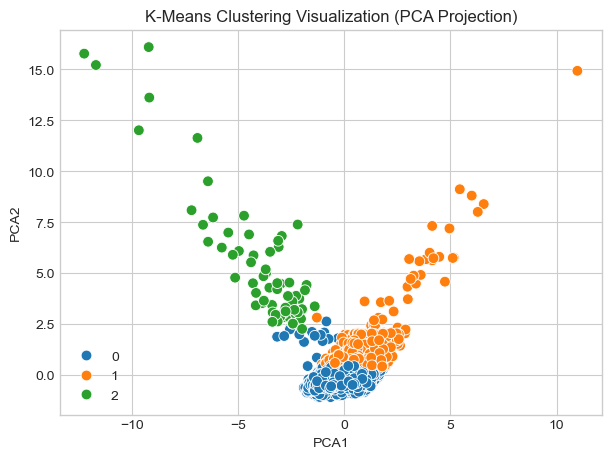

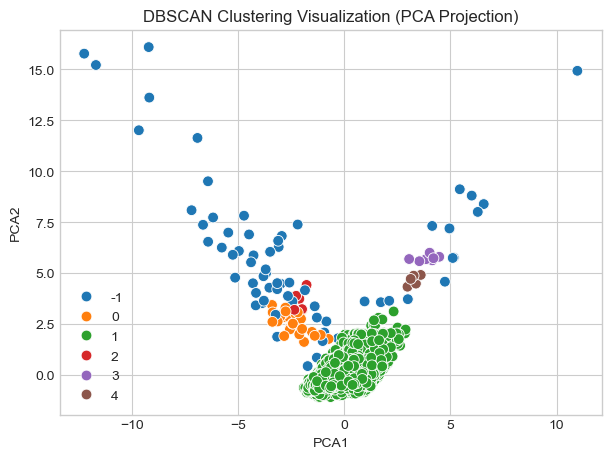


K-Means Cluster Profiles:
                ProcessingDays  CostPerUnit  FreightRatio
KMeansCluster                                           
0                       51.88         9.81          0.01
1                       52.10        25.40          0.01
2                       50.24        12.21          0.04

DBSCAN Cluster Profiles:
                ProcessingDays  CostPerUnit  FreightRatio
DBSCANCluster                                           
0                       50.79         8.87          0.03
1                       51.91        12.03          0.01
2                       57.80        10.28          0.03
3                       51.50        78.28          0.01
4                       51.80        66.40          0.00

Comparison Summary:

    Method  No. of Clusters  Silhouette Score  Noise Points (DBSCAN only)
0  K-Means                3          0.403558                           0
1   DBSCAN                6          0.646847                          66


In [4]:

# Vendor_Clustering.ipynb


# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 2: Load Dataset
df = pd.read_csv('data/vendor_invoice.csv')
print("Shape:", df.shape)
display(df.head())

# Step 3: Convert Date Columns to Datetime
date_cols = ["InvoiceDate", "PODate", "PayDate"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Step 4: Feature Engineering
df["ProcessingDays"] = (df["PayDate"] - df["PODate"]).dt.days
df["CostPerUnit"] = df["Dollars"] / df["Quantity"].replace(0, np.nan)
df["FreightRatio"] = df["Freight"] / df["Dollars"].replace(0, np.nan)
df = df.dropna(subset=["ProcessingDays", "CostPerUnit", "FreightRatio"])

# Step 5: Select Features for Clustering
features = ["ProcessingDays", "CostPerUnit", "FreightRatio"]
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: K-Means Clustering
# Determine optimal k using the Elbow method
inertia = []
k_values = range(2, 10)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Choose optimal k (based on elbow curve)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["KMeansCluster"] = kmeans.fit_predict(X_scaled)

# Step 7: DBSCAN Clustering
dbscan = DBSCAN(eps=0.8, min_samples=5)
df["DBSCANCluster"] = dbscan.fit_predict(X_scaled)

# Step 8: Evaluate Clustering Performance
# Silhouette score for K-Means
kmeans_sil = silhouette_score(X_scaled, df["KMeansCluster"])

# Silhouette score for DBSCAN (excluding noise points)
if len(set(df["DBSCANCluster"])) > 1 and (-1 in df["DBSCANCluster"].values):
    mask = df["DBSCANCluster"] != -1
    dbscan_sil = silhouette_score(X_scaled[mask], df["DBSCANCluster"][mask])
elif len(set(df["DBSCANCluster"])) > 1:
    dbscan_sil = silhouette_score(X_scaled, df["DBSCANCluster"])
else:
    dbscan_sil = np.nan

print("Silhouette Scores:")
print(f"K-Means: {kmeans_sil:.3f}")
print(f"DBSCAN: {dbscan_sil:.3f}")

# Step 9: Visualize Clusters using PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

# K-Means Visualization
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="KMeansCluster", palette="tab10", s=60)
plt.title("K-Means Clustering Visualization (PCA Projection)")
plt.legend()
plt.show()

# DBSCAN Visualization
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="DBSCANCluster", palette="tab10", s=60)
plt.title("DBSCAN Clustering Visualization (PCA Projection)")
plt.legend()
plt.show()

# Step 10: Compare Cluster Profiles
# K-Means Cluster Means
kmeans_profile = df.groupby("KMeansCluster")[features].mean().round(2)
print("\nK-Means Cluster Profiles:\n", kmeans_profile)

# DBSCAN Cluster Means (excluding noise)
dbscan_profile = df[df["DBSCANCluster"] != -1].groupby("DBSCANCluster")[features].mean().round(2)
print("\nDBSCAN Cluster Profiles:\n", dbscan_profile)

# Step 11: Comparison Summary
comparison = pd.DataFrame({
    "Method": ["K-Means", "DBSCAN"],
    "No. of Clusters": [len(df["KMeansCluster"].unique()), len(df["DBSCANCluster"].unique())],
    "Silhouette Score": [kmeans_sil, dbscan_sil],
    "Noise Points (DBSCAN only)": [0, (df["DBSCANCluster"] == -1).sum()]
})

print("\nComparison Summary:\n")
print(comparison)


Initial Data Overview:
   VendorNumber                   VendorName InvoiceDate  PONumber  \
0           105  ALTAMAR BRANDS LLC           2024-01-04      8124   
1          4466  AMERICAN VINTAGE BEVERAGE    2024-01-07      8137   
2           388  ATLANTIC IMPORTING COMPANY   2024-01-09      8169   
3           480  BACARDI USA INC              2024-01-12      8106   
4           516  BANFI PRODUCTS CORP          2024-01-07      8170   

       PODate     PayDate  Quantity    Dollars  Freight Approval  
0  2023-12-21  2024-02-16         6     214.26     3.47      NaN  
1  2023-12-22  2024-02-21        15     140.55     8.57      NaN  
2  2023-12-24  2024-02-16         5     106.60     4.61      NaN  
3  2023-12-20  2024-02-05     10100  137483.78  2935.20      NaN  
4  2023-12-24  2024-02-12      1935   15527.25   429.20      NaN  

Columns: ['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval']

Anomaly Counts:
Is

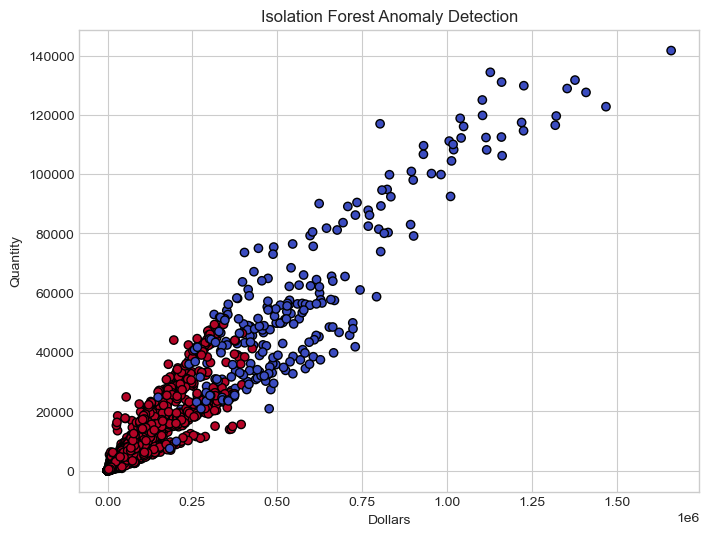


✅ Anomaly detection completed successfully!


In [5]:

# VENDOR INVOICE ANOMALY DETECTION
# Using Isolation Forest & One-Class SVM


# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

# Step 2: Load dataset
# Replace with your actual file path
df = pd.read_csv('data/vendor_invoice.csv')

# Step 3: Display basic info
print("Initial Data Overview:")
print(df.head())
print("\nColumns:", df.columns.tolist())

# Step 4: Convert date columns to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['PODate'] = pd.to_datetime(df['PODate'], errors='coerce')

# Step 5: Handle missing values if any
df = df.dropna(subset=['InvoiceDate', 'PODate', 'Quantity', 'Dollars', 'Freight'])

# Step 6: Convert dates into numeric format (days since minimum date)
df['InvoiceDays'] = (df['InvoiceDate'] - df['InvoiceDate'].min()).dt.days
df['PODays'] = (df['PODate'] - df['PODate'].min()).dt.days

# Step 7: Encode categorical features
le_vendor = LabelEncoder()
le_name = LabelEncoder()
le_po = LabelEncoder()

df['VendorNumber'] = le_vendor.fit_transform(df['VendorNumber'])
df['VendorName'] = le_name.fit_transform(df['VendorName'])
df['PONumber'] = le_po.fit_transform(df['PONumber'])

# Step 8: Select numerical features for modeling
features = ['VendorNumber','VendorName','InvoiceDays','PONumber','PODays','Quantity','Dollars','Freight']
X = df[features]

# Step 9: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 10: Isolation Forest Model
iso = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly_IF'] = iso.fit_predict(X_scaled)

# Step 11: One-Class SVM Model
ocsvm = OneClassSVM(kernel='rbf', nu=0.05, gamma='auto')
df['Anomaly_OCSVM'] = ocsvm.fit_predict(X_scaled)

# Step 12: Count anomalies
print("\nAnomaly Counts:")
print("Isolation Forest:\n", df['Anomaly_IF'].value_counts())
print("\nOne-Class SVM:\n", df['Anomaly_OCSVM'].value_counts())

# Step 13: Extract anomaly records
anomalies_if = df[df['Anomaly_IF'] == -1]
anomalies_ocsvm = df[df['Anomaly_OCSVM'] == -1]

print("\nIsolation Forest Detected Anomalies:")
print(anomalies_if.head())

print("\nOne-Class SVM Detected Anomalies:")
print(anomalies_ocsvm.head())

# Step 14: Visualize anomalies (based on Isolation Forest)
plt.figure(figsize=(8,6))
plt.scatter(df['Dollars'], df['Quantity'], 
            c=df['Anomaly_IF'], cmap='coolwarm', edgecolor='k')
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Dollars')
plt.ylabel('Quantity')
plt.show()

# Step 15: (Optional) Save anomalies to CSV
anomalies_if.to_csv("isolation_forest_anomalies.csv", index=False)
anomalies_ocsvm.to_csv("oneclass_svm_anomalies.csv", index=False)

print("\n✅ Anomaly detection completed successfully!")


Dataset shape: (279708, 14)
Columns: ['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'VendorName']
           InventoryId  Store  Brand                 Description   Size  \
0  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses  750mL   
1  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses  750mL   
2  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses  750mL   

   SalesQuantity  SalesDollars  SalesPrice  SalesDate  Volume  Classification  \
0            1.0         16.49       16.49 2024-01-01   750.0             1.0   
1            2.0         32.98       16.49 2024-01-02   750.0             1.0   
2            1.0         16.49       16.49 2024-01-03   750.0             1.0   

   ExciseTax  VendorNo                   VendorName  
0       0.79   12546.0  JIM BEAM BRANDS COMPANY      
1       1.57   12546.0  JIM BEAM BRANDS COMPA

C:\Users\Swati\AppData\Local\Temp\ipykernel_16828\452159926.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store', y='SalesDollars', data=top_stores, palette='Blues_d')


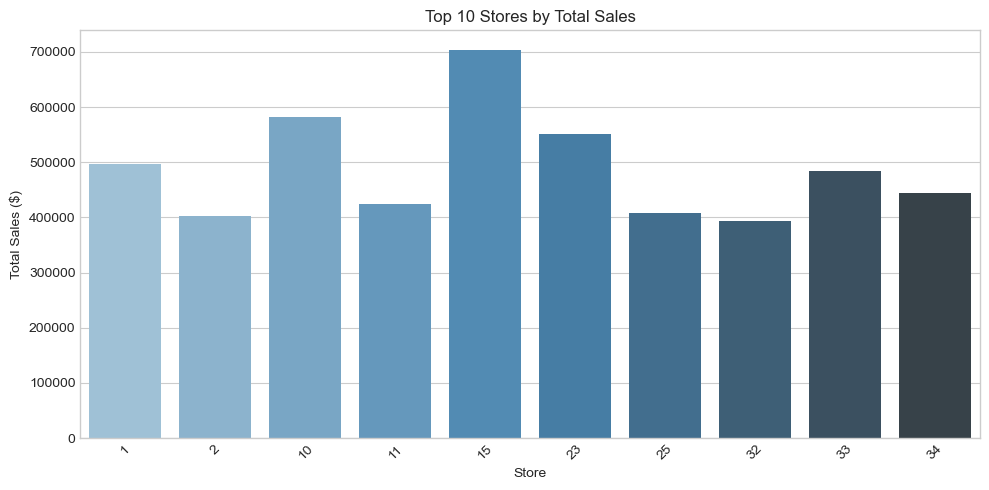

C:\Users\Swati\AppData\Local\Temp\ipykernel_16828\452159926.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store', y='AvgSalePerItem', data=top_stores, palette='Greens_d')


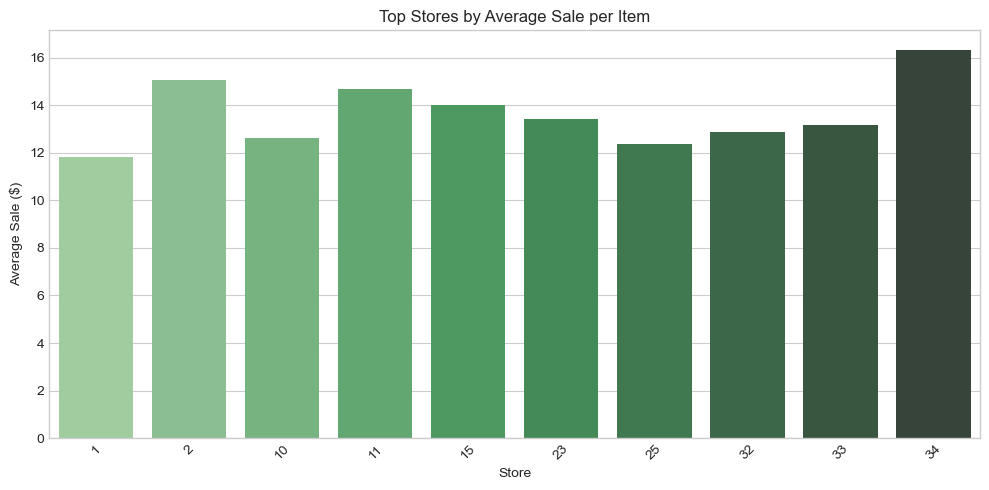

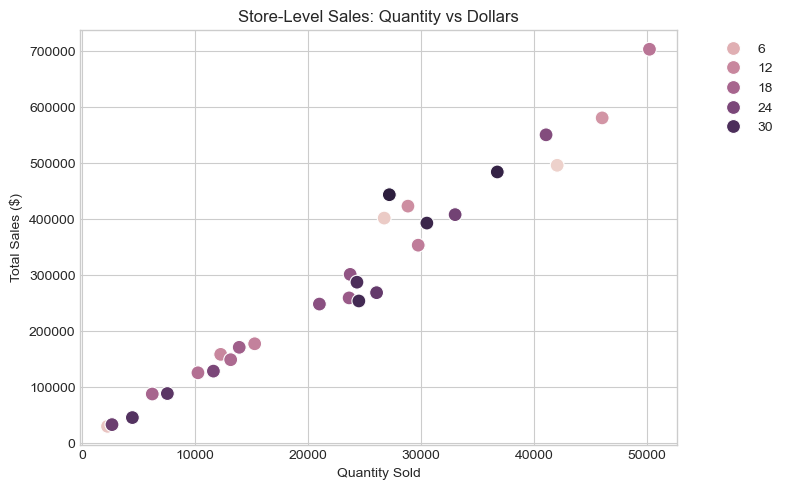

D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


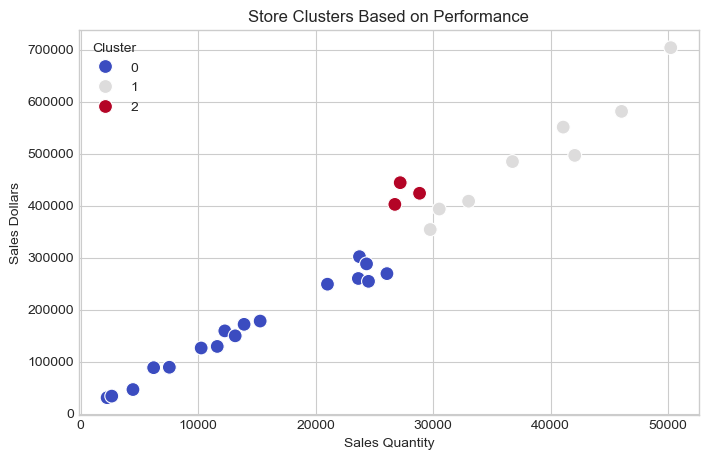


📊 Summary Insights:
Total Stores Analyzed: 28
Top Performing Store: 15.0 ($703854.47)
Lowest Performing Store: 3.0 ($30556.67)

Cluster Performance Summary:
          SalesDollars  SalesQuantity  AvgSalePerItem
Cluster                                             
0           166075.91       14282.53           11.92
1           496715.18       38677.00           12.78
2           423440.75       27592.33           15.36


In [8]:

# REGIONAL / STORE-LEVEL SALES ANALYSIS


# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 2: Load data
df = pd.read_csv("data/sales.csv")

# Step 3: Clean column names
df.columns = df.columns.str.strip()

# Step 4: Convert date column and handle missing values
if 'SalesDate' in df.columns:
    df['SalesDate'] = pd.to_datetime(df['SalesDate'], errors='coerce')

df.fillna({'SalesDollars': 0, 'SalesQuantity': 0, 'SalesPrice': 0, 'Store': 'Unknown'}, inplace=True)

# Step 5: Check basic info
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head(3))

# Step 6: Aggregate metrics by store
store_summary = df.groupby('Store').agg({
    'SalesDollars': 'sum',
    'SalesQuantity': 'sum',
    'SalesPrice': 'mean',
    'ExciseTax': 'sum' if 'ExciseTax' in df.columns else 'mean'
}).reset_index()

# Step 7: Calculate derived KPIs
store_summary['AvgSalePerItem'] = store_summary['SalesDollars'] / store_summary['SalesQuantity']
store_summary['RevenueShare(%)'] = (store_summary['SalesDollars'] / store_summary['SalesDollars'].sum()) * 100

# Step 8: Top and bottom stores
top_stores = store_summary.sort_values('SalesDollars', ascending=False).head(10)
bottom_stores = store_summary.sort_values('SalesDollars', ascending=True).head(10)

print("\n🏆 Top 10 Stores by Total Sales:\n", top_stores[['Store', 'SalesDollars']])
print("\n⚠ Bottom 10 Stores by Total Sales:\n", bottom_stores[['Store', 'SalesDollars']])

# ----------------------------------------------------------
# Step 9: 📊 VISUALIZATIONS
# ----------------------------------------------------------

plt.figure(figsize=(10,5))
sns.barplot(x='Store', y='SalesDollars', data=top_stores, palette='Blues_d')
plt.title("Top 10 Stores by Total Sales")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x='Store', y='AvgSalePerItem', data=top_stores, palette='Greens_d')
plt.title("Top Stores by Average Sale per Item")
plt.ylabel("Average Sale ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='SalesQuantity', y='SalesDollars', hue='Store', data=store_summary, s=100)
plt.title("Store-Level Sales: Quantity vs Dollars")
plt.xlabel("Quantity Sold")
plt.ylabel("Total Sales ($)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# Step 10: 🤖 (Optional) Cluster stores by performance
# ----------------------------------------------------------

features = ['SalesDollars', 'SalesQuantity', 'AvgSalePerItem']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(store_summary[features])

kmeans = KMeans(n_clusters=3, random_state=42)
store_summary['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,5))
sns.scatterplot(
    x='SalesQuantity', y='SalesDollars', 
    hue='Cluster', palette='coolwarm', data=store_summary, s=100
)
plt.title("Store Clusters Based on Performance")
plt.xlabel("Sales Quantity")
plt.ylabel("Sales Dollars")
plt.show()

# ----------------------------------------------------------
# Step 11: Insights summary
# ----------------------------------------------------------

print("\n📊 Summary Insights:")
print(f"Total Stores Analyzed: {store_summary['Store'].nunique()}")
print(f"Top Performing Store: {top_stores.iloc[0]['Store']} (${top_stores.iloc[0]['SalesDollars']:.2f})")
print(f"Lowest Performing Store: {bottom_stores.iloc[0]['Store']} (${bottom_stores.iloc[0]['SalesDollars']:.2f})")

cluster_summary = store_summary.groupby('Cluster')[['SalesDollars','SalesQuantity','AvgSalePerItem']].mean()
print("\nCluster Performance Summary:\n", cluster_summary.round(2))